<a href="https://colab.research.google.com/github/yejijang-analyst/ESAA/blob/main/5_1_Evaluation_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 모듈 및 데이터 로드
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

data = load_breast_cancer()

# x, y 데이터 생성
X = data.data

# 악성을 1, 양성을 0으로
y = 1 - data.target

# 특징으로 사용할 데이터를 평균으로 구분하는 10개 열로 축소
X = X[:, :10]

# 로지스틱 회귀 모델 생성
model_lor = LogisticRegression(solver = 'lbfgs')
model_lor.fit(X,y)
y_pred = model_lor.predict(X)

* 오차 행렬(혼동 행렬) 생성

In [2]:
# 종속 변수와 예측 결과로 혼동 행렬 생성
from sklearn.metrics import confusion_matrix

confusion_matrix(y, y_pred)

array([[337,  20],
       [ 30, 182]])

In [4]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

* 정확도

In [3]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y, y_pred))

0.9121265377855887


* 정밀도

In [6]:
print(precision_score(y, y_pred))

0.900990099009901


* 재현율

In [7]:
print(recall_score(y, y_pred))

0.8584905660377359


* F1 score

In [8]:
from sklearn.metrics import f1_score
print(f1_score(y, y_pred))

0.8792270531400966


* 예측 확률(pred_proba) : 0으로 예측할 확률이 0.1보다 크면 y_pred2 에 넣는다 가정.

In [12]:
pred_proba =model_lor.predict_proba(X)

In [43]:
print(y.shape)
print(y_pred2.shape)
print(y)
print(y_pred2)
print(pred_proba)


(569,)
(569,)
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 

In [44]:
from sklearn.preprocessing import Binarizer

mythreshold = 0.1
mypred_proba = pred_proba[:,1]

binarizer = Binarizer(threshold = mythreshold).fit(pred_proba)
y_pred2 = binarizer.transform(pred_proba)[:,0]



In [45]:
# y과 y_pred2의 혼동행렬, 정확도, 정밀도, 재현율, f1 score 구하기

# 혼동행렬
print(confusion_matrix(y,y_pred2))
# 정확도
print(accuracy_score(y, y_pred2))
# 정밀도
print(precision_score(y,y_pred2))
# 재현율
print(recall_score(y,y_pred2))
# f1 score
print(f1_score(y, y_pred2))

[[  1 356]
 [139  73]]
0.13005272407732865
0.17016317016317017
0.3443396226415094
0.2277691107644306


* ROC 곡선 시각화

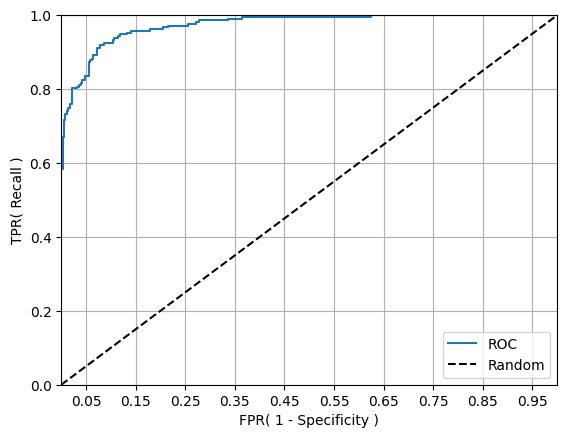

In [42]:
from sklearn.metrics import roc_curve
import numpy as np

def roc_curve_plot(y_test , pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환 받음.
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

    # ROC Curve를 plot 곡선으로 그림.
    plt.plot(fprs , tprs, label='ROC')
    # 가운데 대각선 직선을 그림.
    plt.plot([0, 1], [0, 1], 'k--', label='Random')

    # FPR X 축의 Scale을 0.1 단위로 변경, X,Y 축명 설정등
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Specificity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.grid()
    plt.show()

roc_curve_plot(y, mypred_proba )

In [33]:
import matplotlib.pyplot as plt


* ROC AUC 값

In [40]:
from sklearn.metrics import roc_auc_score

roc_score = roc_auc_score(y, mypred_proba)
print('ROC AUC 값: {0:.4f}'.format(roc_score))

ROC AUC 값: 0.9741
